In [119]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import os
import sys
import math

from datetime import datetime
from datetime import timedelta
import datetime

from scipy import spatial
from numpy import array
from numpy import corrcoef
from scipy.spatial import distance

from sklearn.preprocessing import MinMaxScaler

def dist_euclidian(v1,v2):
    return distance.euclidean(v1, v2)

def measure_cossine(v1,v2):
    return (1 - spatial.distance.cosine(v1, v2))

def measure_correlation(v1,v2):
    return corrcoef(v1,v2)[0,1]

def dist_correlation(dc):
    return math.sqrt(2 *(1 - dc))

def measure_angle(arcc):
    return math.degrees(np.arccos(arcc))

def measure(v1,v2):
    #return measure_correlation(v1,v2)
    return measure_correlation(v1,v2)

In [120]:
df = pd.DataFrame()
path = (os.path.abspath(".")) + "/../../../ds/supertrunfo/datasete/"
filename = "s4.csv"
file = path + str(filename)
df = pd.read_csv(file, delimiter=",", dtype={
    'name': str, 'speed': float, 'hp':float, 'kW':float, 't100':float,
    'cc':float, 'cil':float, 'weigth':float
   })


In [121]:
df.head(10)

,name,speed,hp,kW,t100,cc,cil,weight
0,'polo sprint',207.0,156.0,115.0,7.8,1900.0,4.0,976
1,'cup polo',190.0,88.0,65.0,8.5,1300.0,4.0,730
2,'polo cupe gt',170.0,75.0,55.0,11.5,1300.0,4.0,730
3,'rally golf gti 1800',200.0,170.0,125.0,6.8,1800.0,4.0,880
4,'golf gti',191.0,112.0,82.0,9.7,1800.0,4.0,920
5,'golf conversivel gls',164.0,90.0,66.0,11.0,1800.0,4.0,945
6,'jetta gt',189.0,112.0,82.0,10.0,1800.0,4.0,970
7,'jetta carat',176.0,90.0,66.0,11.1,1800.0,4.0,930
8,'jetta cl turbo diesel',158.0,70.0,51.0,15.0,1600.0,4.0,975
9,'bi motor scirocco',245.0,282.0,208.0,5.9,3600.0,8.0,1378


In [122]:
df.columns

Index(['name', 'speed', 'hp', 'kW', 't100', 'cc', 'cil', 'weight'], dtype='object')

In [123]:
df.describe()

,speed,hp,kW,t100,cc,cil,weight
count,24.000000,24.000000,24.000000,24.000000,24.000000,24.00000,24.000000
mean,172.125000,103.208333,75.833333,13.850000,1775.000000,4.25000,1024.541667
std,32.801528,52.867331,38.971190,7.693475,474.799729,0.84699,286.176440
min,115.000000,34.000000,25.000000,5.900000,1100.000000,4.00000,590.000000
25%,153.250000,74.250000,54.500000,9.400000,1600.000000,4.00000,887.500000
50%,178.000000,90.000000,66.000000,11.050000,1800.000000,4.00000,937.500000
75%,191.000000,112.750000,82.750000,16.375000,1900.000000,4.00000,1141.250000
max,245.000000,282.000000,208.000000,33.000000,3600.000000,8.00000,1800.000000


In [124]:
columns = ['name']
df.drop(columns, inplace=True, axis=1)
df.head(5)

,speed,hp,kW,t100,cc,cil,weight
0,207.0,156.0,115.0,7.8,1900.0,4.0,976
1,190.0,88.0,65.0,8.5,1300.0,4.0,730
2,170.0,75.0,55.0,11.5,1300.0,4.0,730
3,200.0,170.0,125.0,6.8,1800.0,4.0,880
4,191.0,112.0,82.0,9.7,1800.0,4.0,920


In [125]:
df.describe()

,speed,hp,kW,t100,cc,cil,weight
count,24.000000,24.000000,24.000000,24.000000,24.000000,24.00000,24.000000
mean,172.125000,103.208333,75.833333,13.850000,1775.000000,4.25000,1024.541667
std,32.801528,52.867331,38.971190,7.693475,474.799729,0.84699,286.176440
min,115.000000,34.000000,25.000000,5.900000,1100.000000,4.00000,590.000000
25%,153.250000,74.250000,54.500000,9.400000,1600.000000,4.00000,887.500000
50%,178.000000,90.000000,66.000000,11.050000,1800.000000,4.00000,937.500000
75%,191.000000,112.750000,82.750000,16.375000,1900.000000,4.00000,1141.250000
max,245.000000,282.000000,208.000000,33.000000,3600.000000,8.00000,1800.000000


In [126]:
scaler = MinMaxScaler() 
scaled_values = scaler.fit_transform(df) 
df.loc[:,:] = scaled_values

In [127]:
df

,speed,hp,kW,t100,cc,cil,weight
0,0.707692,0.491935,0.491803,0.070111,0.32,0.00,0.319008
1,0.576923,0.217742,0.218579,0.095941,0.08,0.00,0.115702
2,0.423077,0.165323,0.163934,0.206642,0.08,0.00,0.115702
3,0.653846,0.548387,0.546448,0.033210,0.28,0.00,0.239669
4,0.584615,0.314516,0.311475,0.140221,0.28,0.00,0.272727
5,0.376923,0.225806,0.224044,0.188192,0.28,0.00,0.293388
6,0.569231,0.314516,0.311475,0.151292,0.28,0.00,0.314050
7,0.469231,0.225806,0.224044,0.191882,0.28,0.00,0.280992
8,0.330769,0.145161,0.142077,0.335793,0.20,0.00,0.318182
9,1.000000,1.000000,1.000000,0.000000,1.00,1.00,0.651240


           speed        hp        kW      t100        cc       cil    weight
speed   1.000000  0.842633  0.842193 -0.912585  0.475914  0.510564 -0.195805
hp      0.842633  1.000000  0.999976 -0.617823  0.798371  0.737696  0.238400
kW      0.842193  0.999976  1.000000 -0.617130  0.799143  0.740264  0.237839
t100   -0.912585 -0.617823 -0.617130  1.000000 -0.239479 -0.259550  0.426004
cc      0.475914  0.798371  0.799143 -0.239479  1.000000  0.859510  0.570123
cil     0.510564  0.737696  0.740264 -0.259550  0.859510  1.000000  0.315654
weight -0.195805  0.238400  0.237839  0.426004  0.570123  0.315654  1.000000


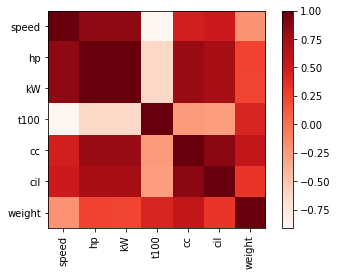

In [128]:
print(df.corr())
plt.imshow(df.corr(), cmap=plt.cm.Reds, interpolation='nearest')
plt.colorbar()
tick_marks = [i for i in range(len(df.columns))]
plt.xticks(tick_marks, df.columns, rotation='vertical')
plt.yticks(tick_marks, df.columns)
plt.show()

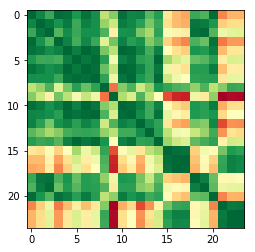

In [132]:
plt.imshow(df.T.corr(), cmap=plt.cm.RdYlGn)
plt.savefig('analise4.pdf')
plt.show()

In [130]:
matriz_cor = df.T.corr()
print(matriz_cor)
dfm = pd.DataFrame(matriz_cor)
filename = "s4_matrix_corr_pearson2.csv"
dfm.to_csv(path+filename)



          0         1         2         3         4         5         6   \
0   1.000000  0.869223  0.721060  0.979309  0.955771  0.797836  0.946169   
1   0.869223  1.000000  0.935339  0.814766  0.918875  0.706099  0.894908   
2   0.721060  0.935339  1.000000  0.648507  0.838429  0.715461  0.822434   
3   0.979309  0.814766  0.648507  1.000000  0.884052  0.683483  0.865509   
4   0.955771  0.918875  0.838429  0.884052  1.000000  0.903534  0.995402   
5   0.797836  0.706099  0.715461  0.683483  0.903534  1.000000  0.929575   
6   0.946169  0.894908  0.822434  0.865509  0.995402  0.929575  1.000000   
7   0.832110  0.828017  0.826157  0.714799  0.952129  0.975232  0.963501   
8   0.317532  0.449676  0.665930  0.167419  0.538389  0.764498  0.584219   
9   0.497572  0.268244 -0.081399  0.551555  0.322707  0.058160  0.285628   
10  0.962875  0.914024  0.818754  0.893043  0.999054  0.895894  0.994283   
11  0.871751  0.865405  0.831023  0.765835  0.974378  0.951399  0.975751   
12  0.888547